In [1]:
import pandas as pd
import re

df=pd.read_csv("occupation_scorpio.csv", sep=';')
print(len(df))
df.head(10)

1250


,occupationLabel,count
0,politician,17294
1,association football player,16615
2,actor,11642
3,writer,8307
4,journalist,5123
5,singer,4707
6,university teacher,4143
7,painter,3573
8,film actor,3350
9,composer,3158


In [2]:
q_data=df.loc[df['occupationLabel'].str.contains(r'Q\d.+')]
q_data_array=q_data['occupationLabel'].values.tolist()
df = df[~df['occupationLabel'].isin(q_data_array)]
df=df.reset_index(drop=True)

In [3]:
data=df.loc[df['occupationLabel'].str.lower().str.contains('rac')]
data_array=data['occupationLabel'].values.tolist()
print(data_array)

['racing automobile driver', 'racing driver', 'motorcycle racer', 'race queen', 'track cyclist', 'boat racer', 'skeleton racer', 'character actor', 'racewalker', 'character animator', 'conspiracy theorist', 'character designer', 'combined track and field event athlete', 'general practitioner', 'arachnologist', 'oracle', 'capoeira practitioner']


In [4]:
doctor=['dentist',
      'gastroenterologist',
      'traumatologist',
      'clinical psychologist', 
      'carcinologist',
      'limnologist', 
      'monologist',
      'anesthesiologist',
        'nurse',
        'therapist',
        'cardiologist',
        'intensivist',
        'neonatologist',
        'dermatologist',
        'physician',
        'endocrinologist',
        'geriatrician',
        'gastroenterologist',
        'haematologist',
        'phlebotomist',
        'nephrologist',
        'neurologist',
        'pathologist',
        'audiologist',
        'oncologist',
        'ophthalmologist',
        'optometrist',
        'otolaryngologist',
        'pulmonologist',
        'internist',
        'pharmacist',
        'neonatalologist',
        'pediatrician',
        'podiatrist',
        'surgeon',
        'psychiatrist',
        'psychologist',
        'social worker',
        'orthopedic physician',
        'sport psychologist',
        'physical therapist',
        'chiropractor',
        'biokineticist',
        'athletic trainer',
        'radiologist',
        'radiotherapist',
        'radiographer',
        'mammographer',
        'neuroradiographer',
        'sonographer',
        'obstetrician',
        'gynaecologist',
        'midwife',
        'doctor',
        'bariatric surgeon',
        'cardiothoracic surgeon',
        'cardiac surgeon',
        'hepatic biliary pancreatic surgeon',
        'neurosurgeon',
        'podiatric surgeon',
        'phytopathologist',
        'obstetrician-gynecologist',
        'urologist']

doctorNum=0

In [5]:
sportist=["association football player",
          'artistic gymnast',
          "baseball player",
          "American football player",
          "basketball player",
          "ice hockey player",
          "rugby union player",
          "volleyball player",
          "handball player",
          "tennis player",
          "chess player",
          "badminton player",
          "rugby league player",
          "Canadian football player",
          "field hockey player",
          "water polo player",
          "table tennis player",
          "futsal player",
          "squash player",
          "beach volleyball player",
          "bandy player",
          "archer",
          "bridge player",
          "Gaelic football player",
          "darts player",
          "poker player",
          "Go player",
          "snooker player",
          "softball player",
          "pool player",
          "lacrosse player",
          "shogi player",
          "draughts player",
          "rink hockey player",
          "cue sports player",
          "gridiron football player",
          "aikidoka",
          "wheelchair tennis player",
          "carom billiards player",
          "Valencian pilota player",
          "bowls player",
          "harmonica player",
          "viol player",
          "viola d'amore player",
          'athletics competitor', 
          'athlete',  
          'biathlete', 
          'taekwondo athlete', 
          'marathon runner', 
          'triathlete', 
          'modern pentathlete', 
          'ultramarathon runner', 
          'professional athlete', 
          'combined track and field event athlete', 
          'decathlete', 
          'heptathlete', 
          'strength athlete', 
          'pentathlete',
          'mixed martial artist', 
          'martial artist',
          'cricketer',
          'sport cyclist',
          'boxer',
          'swimmer',
          'amateur wrestler',
          'figure skater',
          'sprinter',
          'artistic gymnast',
          'golfer',
          'motorcycle racer', 
          'boat racer', 
          'skeleton racer',
          'racing automobile driver', 
          'racing driver', 
          'track cyclist', 
          'racewalker', 
          'capoeira practitioner'
          'professional wrestler',
          "competitive player"]

sportistNum=0

In [6]:
scientist=["scientist",
           'statistician',
           'botanist',
           'astronomer',
           'mathematician',
           "computer scientist",
           "political scientist",
           "nuclear scientist",
           "neuroscientist",
           "herpetologist",
           "social scientist",
           "earth scientist",
           "materials scientist",
           "forestry scientist",
           "environmental scientist",
           "food scientist",
           "parasitologist",
           "atmospheric scientist",
           "paleobiologist",
           'sociologist', 
           'archaeologist', 
           'musicologist', 
           'anthropologist', 
           'biologist', 
           'entomologist', 
           'geologist', 
           'zoologist', 
           'philologist', 
           'classical philologist', 
           'paleontologist',  
           'meteorologist', 
           'ornithologist', 
           'ethnologist', 
           'ecologist', 
           'mycologist', 
           'pharmacologist', 
           'physiologist', 
           'classical archaeologist', 
           'television meteorologist', 
           'microbiologist', 
           'immunologist', 
           'molecular biologist', 
           'criminologist', 
           'virologist', 
           'genealogist', 
           'egyptologist', 
           'ichthyologist', 
           'topologist', 
           'sinologist', 
           'museologist',  
           'epidemiologist', 
           'ethnomusicologist', 
           'speleologist', 
           'theatrologist', 
           'dialectologist', 
           'ufologist', 
           'climatologist', 
           'lichenologist', 
           'bacteriologist', 
           'hematologist', 
           'paleoanthropologist', 
           'seismologist', 
           'arachnologist', 
           'Esperantologist', 
           'sexologist', 
           'hydrogeologist', 
           'primatologist', 
           'glaciologist', 
           'Educational Psychologist', 
           'papyrologist',  
           'evolutionary biologist', 
           'hydrologist', 
           'Near Eastern archaeologist',  
           'acarologist', 
           'histologist', 
           'stomatologist', 
           'tibetologist', 
           'cell biologist', 
           'developmental biologist',   
           'physicist', 
           'astrophysicist', 
           'theoretical physicist', 
           'biophysicist', 
           'geophysicist',
           'chemist', 
           'biochemist', 
           'physical chemist', 
           'organic chemist',
           'biochemist', 
           'biophysicist', 
           'bioinformatician']

scientistNum=0

In [7]:
engineer=['engineer', 
            'civil engineer', 
            'aerospace engineer', 
            'audio engineer', 
            'mechanical engineer', 
            'electrical engineer', 
            'chemical engineer', 
            'mining engineer', 
            'agricultural engineer', 
            'structural engineer', 
            'industrial engineer', 
            'hydraulic engineer', 
            'railroad engineer', 
            'electronics engineer', 
            'engineering technologist', 
            'telecommunications engineer', 
            'state-certified engineers specializing in building construction', 
            'biomedical engineer', 
            'business engineering', 
            'environmental engineer', 
            'bioengineer',
            "biotechnologist",
            'marine engineer']

engineerNum=0

In [8]:
artist=['artist',          
        'comics artist',          
        'graphic artist',          
        'visual artist',          
        'cabaret artist',          
        'textile artist',           
        'make-up artist',          
        'performance artist',          
        'installation artist',          
        'street artist',          
        'video artist',          
        'stained-glass artist',          
        'music artist',          
        'storyboard artist',          
        'glass artist',          
        'concept artist', 
        'mime artist',           
        'spoken word artist',           
        'sound artist',           
        'graffiti artist',           
        'digital artist',           
        'tattoo artist',           
        'artist blacksmith',                   
        'con artist',           
        'conceptual artist',           
        'clean-up artist',          
        'painter',          
        'illustrator',
        'sculptor',
        'Origami artist']

artistNum=0

In [15]:
actor=['actor', 
       'film actor',     
       'television actor', 
       'stage actor',     
       'voice actor',     
       'pornographic actor',     
       'child actor',      
       'dub actor',     
       'character actor',     
       'kabuki actor',     
       'musical theatre actor', 
       'audio drama actor']

actorNum=0

In [9]:
writer=['writer', 
        'screenwriter', 
        'songwriter', 
        'singer-songwriter', 
        "children's writer", 
        'science fiction writer', 
        'non-fiction writer', 
        'detective writer', 
        'broadcast writer', 
        'comics writer', 
        'short story writer', 
        'physician writer', 
        'writer in Prevezanika Chronika', 
        'sportswriter', 
        'hymnwriter', 
        'science writer', 
        'speechwriter', 
        'medical writer', 
        'technical writer',
        'novelist',
        'poet', 
        'tanka poet',
        'haiku poet',
        'political writer']

writerNum=0

In [10]:
musician=['musician', 
        'jazz musician',  
        'church musician', 
        'rock musician', 
        'singer', 
        'opera singer', 
        'playback singer',
        'experimental musician']

musicianNum=0

In [11]:
director=['film director', 
          'theatre director', 
          'director', 
          'television director', 
          'choir director', 
          'art director', 
          'museum director', 
          'sporting director', 
          'music director', 
          'sporting director', 
          'funeral director', 
          'music video director', 
          'casting director', 
          'artistic director', 
          'assistant director', 
          'director of church music', 
          'dubbing director', 
          'pornographic film director', 
          'artistic director', 
          'general director', 
          'director of audiography', 
          'opera director', 
          'director of radio drama', 
          'film or television director', 
          'board of directors', 
          'Director of Research at CNRS']

directorNum=0

In [12]:
manager=['association football manager', 
          'manager', 
          'talent manager', 
          'baseball manager', 
          'cultural manager', 
          'theatre manager', 
          'business manager', 
          'hotel manager', 
          'campaign manager', 
          'purchasing manager']

managerNum=0

In [13]:
for i in range(len(scientist)):
    for j in range(len(artist)):
        if scientist[i]==artist[j]:
            print(scientist[i])

In [16]:
for i in range(len(df.index)):
    for j in range(len(sportist)):
        if df.at[i,'occupationLabel'] == sportist[j]:
            sportistNum += int(df.at[i,'count'])
            
    for j in range(len(scientist)):
        if df.at[i,'occupationLabel'] == scientist[j]:
            scientistNum += int(df.at[i,'count'])
            
    for j in range(len(engineer)):
        if df.at[i,'occupationLabel'] == engineer[j]:
            engineerNum += int(df.at[i,'count'])
            
    for j in range(len(doctor)):
        if df.at[i,'occupationLabel'] == doctor[j]:
            doctorNum += int(df.at[i,'count'])
            
    for j in range(len(artist)):
        if df.at[i,'occupationLabel'] == artist[j]:
            artistNum += int(df.at[i,'count'])
                        
    for j in range(len(actor)):
        if df.at[i,'occupationLabel'] == actor[j]:
            actorNum += int(df.at[i,'count'])
                
    for j in range(len(writer)):
        if df.at[i,'occupationLabel'] == writer[j]:
            writerNum += int(df.at[i,'count'])
                        
    for j in range(len(musician)):
        if df.at[i,'occupationLabel'] == musician[j]:
            musicianNum += int(df.at[i,'count'])
                    
    for j in range(len(director)):
        if df.at[i,'occupationLabel'] == director[j]:
            directorNum += int(df.at[i,'count'])
                        
    for j in range(len(manager)):
        if df.at[i,'occupationLabel'] == manager[j]:
            managerNum += int(df.at[i,'count'])
            
df = df[~df['occupationLabel'].isin(doctor)]
df = df[~df['occupationLabel'].isin(sportist)]
df = df[~df['occupationLabel'].isin(scientist)]
df = df[~df['occupationLabel'].isin(engineer)]
df = df[~df['occupationLabel'].isin(artist)]
df = df[~df['occupationLabel'].isin(actor)]
df = df[~df['occupationLabel'].isin(writer)]
df = df[~df['occupationLabel'].isin(musician)]
df = df[~df['occupationLabel'].isin(director)]
df = df[~df['occupationLabel'].isin(manager)]

df=df.reset_index(drop=True)

print(sportistNum)
df = df.append({'occupationLabel': 'sportist','count': sportistNum}, ignore_index=True)

print(scientistNum)
df = df.append({'occupationLabel': 'scientist','count': scientistNum}, ignore_index=True)

print(engineerNum)
df = df.append({'occupationLabel': 'engineer','count': engineerNum}, ignore_index=True)

print(doctorNum)
df = df.append({'occupationLabel': 'doctor','count': doctorNum}, ignore_index=True)

print(artistNum)
df = df.append({'occupationLabel': 'artist','count': artistNum}, ignore_index=True)

print(actorNum)
df = df.append({'occupationLabel': 'actor','count': actorNum}, ignore_index=True)

print(writerNum)
df = df.append({'occupationLabel': 'writer','count': writerNum}, ignore_index=True)

print(musicianNum)
df = df.append({'occupationLabel': 'musician','count': musicianNum}, ignore_index=True)

print(directorNum)
df = df.append({'occupationLabel': 'director','count': directorNum}, ignore_index=True)

print(managerNum)
df = df.append({'occupationLabel': 'manager','count': managerNum}, ignore_index=True)

45059
8665
1691
2524
6593
19442
17016
8024
3473
2143


In [17]:
df_sort=df.sort_values(by=['count'], ascending=False)
df_sort=df_sort.reset_index(drop=True)

df_sort_10=df_sort.drop(df.index[20:len(df.index)])
df_sort_10.head(20)

,occupationLabel,count
0,sportist,45059
1,actor,19442
2,politician,17294
3,writer,17016
4,scientist,8665
5,musician,8024
6,artist,6593
7,journalist,5123
8,university teacher,4143
9,director,3473


Text(0, 0.5, 'occupation')

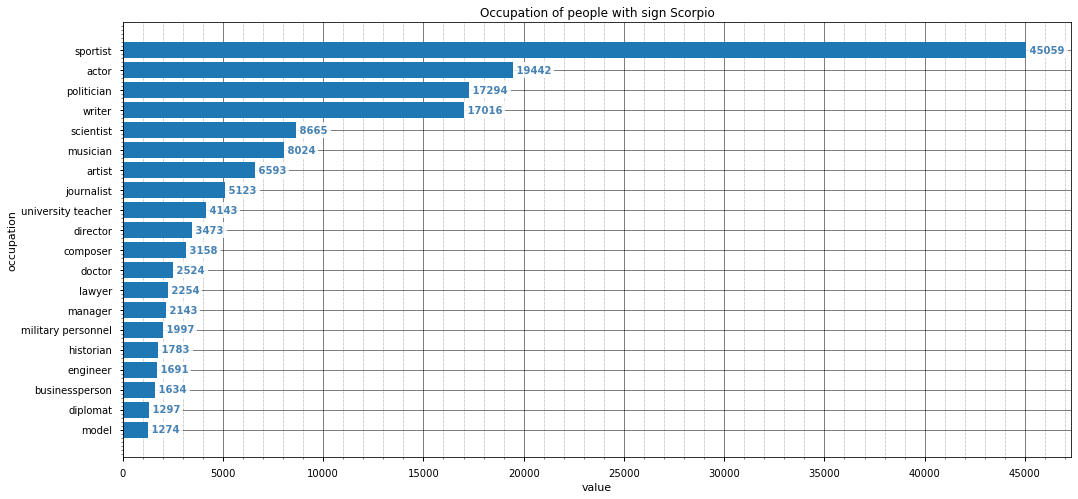

In [18]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
plt.style.use('seaborn-notebook')

fig, ax = plt.subplots(figsize=(17,8))

ax.barh(df_sort_10['occupationLabel'], df_sort_10['count'], align='center', zorder=2)
ax.invert_yaxis()
# ax.grid(which='major', axis='both', linestyle='--', alpha=0.7, linewidth=0.7)

ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth=0.5, color='black', zorder=0)
ax.grid(which='minor', linestyle=':', linewidth=0.5, color='black', alpha=0.7, axis='x', zorder=0)

ax.xaxis.set_major_locator(ticker.MultipleLocator(5000))
# plt.gca().xaxis.set_major_locator(plt.MultipleLocator(5000))

for i, v in enumerate(df_sort_10['count']):
    plt.text(v, i, " "+str(v), color='steelblue', va='center', backgroundcolor='white', zorder=1, fontweight='bold',
             bbox={'facecolor':'white', 'alpha':0.85, 'edgecolor':'none', 'pad':3})

ax.set_title('Occupation of people with sign Scorpio')
ax.set_xlabel('value')
ax.set_ylabel('occupation')